In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller

## Stock Price Data Analysis

In [2]:
# Define the stock ticker symbol
stock_symbol = 'AAPL' 

# Fetch stock data
stock = yf.Ticker(stock_symbol)
df = stock.history(period="1y")  # Fetching data for the past 1 year
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-30 00:00:00-05:00,127.696239,129.227672,126.721683,129.207779,77034200,0.0,0.0
2023-01-03 00:00:00-05:00,129.555841,130.172390,123.479803,124.374802,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,126.184691,127.944857,124.384755,125.657639,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.423361,127.059803,124.066539,124.325089,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,125.309594,129.565795,124.195816,128.899521,87754700,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.0


In [14]:
df.index

DatetimeIndex(['2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00',
               '2023-01-04 00:00:00-05:00', '2023-01-05 00:00:00-05:00',
               '2023-01-06 00:00:00-05:00', '2023-01-09 00:00:00-05:00',
               '2023-01-10 00:00:00-05:00', '2023-01-11 00:00:00-05:00',
               '2023-01-12 00:00:00-05:00', '2023-01-13 00:00:00-05:00',
               ...
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=251, freq=None)

In [13]:
df.index.day_name()

Index(['Friday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='Date', length=251)

In [15]:
pd.date_range('2019-01-01', '2019-12-31', freq='D')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [16]:
pd.date_range('2019-01-01', periods=24, freq='H')

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00', '2019-01-01 13:00:00',
               '2019-01-01 14:00:00', '2019-01-01 15:00:00',
               '2019-01-01 16:00:00', '2019-01-01 17:00:00',
               '2019-01-01 18:00:00', '2019-01-01 19:00:00',
               '2019-01-01 20:00:00', '2019-01-01 21:00:00',
               '2019-01-01 22:00:00', '2019-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
df['Close'].asfreq('H')

Date
2022-12-30 00:00:00-05:00    129.207779
2022-12-30 01:00:00-05:00           NaN
2022-12-30 02:00:00-05:00           NaN
2022-12-30 03:00:00-05:00           NaN
2022-12-30 04:00:00-05:00           NaN
                                ...    
2023-12-28 20:00:00-05:00           NaN
2023-12-28 21:00:00-05:00           NaN
2023-12-28 22:00:00-05:00           NaN
2023-12-28 23:00:00-05:00           NaN
2023-12-29 00:00:00-05:00    192.529999
Freq: H, Name: Close, Length: 8737, dtype: float64

In [19]:
df['Close'].asfreq('H', method='ffill')  # missing values will be filled with the last available value

Date
2022-12-30 00:00:00-05:00    129.207779
2022-12-30 01:00:00-05:00    129.207779
2022-12-30 02:00:00-05:00    129.207779
2022-12-30 03:00:00-05:00    129.207779
2022-12-30 04:00:00-05:00    129.207779
                                ...    
2023-12-28 20:00:00-05:00    193.580002
2023-12-28 21:00:00-05:00    193.580002
2023-12-28 22:00:00-05:00    193.580002
2023-12-28 23:00:00-05:00    193.580002
2023-12-29 00:00:00-05:00    192.529999
Freq: H, Name: Close, Length: 8737, dtype: float64

In [3]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
Date,,,,,,,,,
2022-12-30 00:00:00-05:00,127.696239,129.227672,126.721683,129.207779,77034200,0.0,0.0,NaN,NaN
2023-01-03 00:00:00-05:00,129.555841,130.172390,123.479803,124.374802,112117500,0.0,0.0,NaN,NaN
2023-01-04 00:00:00-05:00,126.184691,127.944857,124.384755,125.657639,89113600,0.0,0.0,NaN,NaN
2023-01-05 00:00:00-05:00,126.423361,127.059803,124.066539,124.325089,80962700,0.0,0.0,NaN,NaN
2023-01-06 00:00:00-05:00,125.309594,129.565795,124.195816,128.899521,87754700,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0,185.306513,178.276933
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0,185.595219,178.502683
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.0,185.888522,178.719123


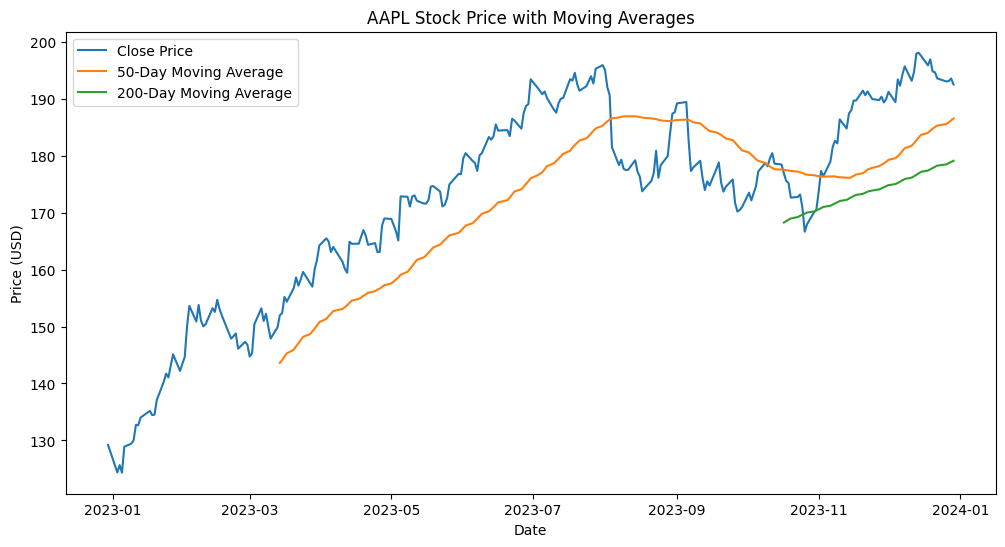

In [4]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.plot(df['MA200'], label='200-Day Moving Average')
plt.title(f"{stock_symbol} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Predicting Stock Prices Using Linear Regression

In [5]:
# Prepare data for Linear Regression
df['Price'] = df['Close']
df['Prediction'] = df['Close'].shift(-30)  # Predicting 30 days into future
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Price,Prediction
Date,,,,,,,,,,,
2022-12-30 00:00:00-05:00,127.696239,129.227672,126.721683,129.207779,77034200,0.0,0.0,NaN,NaN,129.207779,152.581055
2023-01-03 00:00:00-05:00,129.555841,130.172390,123.479803,124.374802,112117500,0.0,0.0,NaN,NaN,124.374802,154.702454
2023-01-04 00:00:00-05:00,126.184691,127.944857,124.384755,125.657639,89113600,0.0,0.0,NaN,NaN,125.657639,153.089005
2023-01-05 00:00:00-05:00,126.423361,127.059803,124.066539,124.325089,80962700,0.0,0.0,NaN,NaN,124.325089,151.933685
2023-01-06 00:00:00-05:00,125.309594,129.565795,124.195816,128.899521,87754700,0.0,0.0,NaN,NaN,128.899521,147.880127
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0,185.306513,178.276933,193.600006,NaN
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0,185.595219,178.502683,193.050003,NaN
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.0,185.888522,178.719123,193.149994,NaN


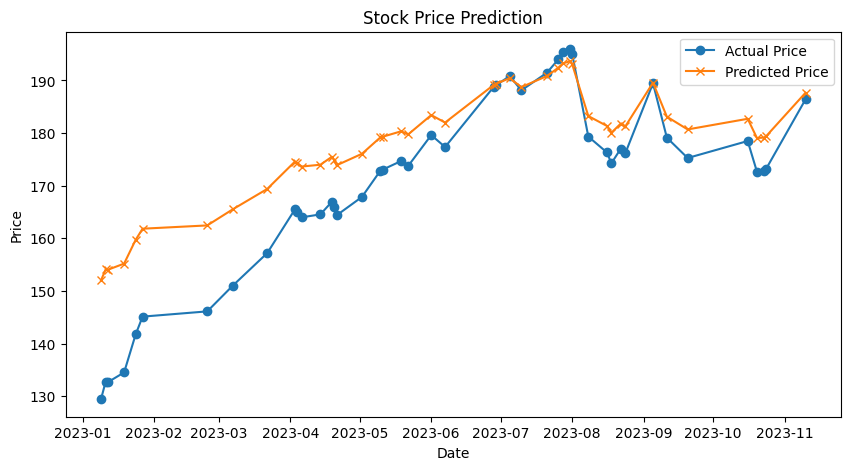

In [6]:
X = df[['Price']][:-30]  # all rows of the DataFrame except the last 30
y = df['Prediction'][:-30]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.sort_index()

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and plot
predicted_prices = model.predict(X_test)
predicted_df = pd.DataFrame(predicted_prices, index=X_test.index, columns=['Predicted Price'])

plt.figure(figsize=(10, 5))
plt.plot(X_test['Price'], label='Actual Price', marker='o')
plt.plot(predicted_df['Predicted Price'], label='Predicted Price', marker='x')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Predicting Stock Prices Using ARIMA (AutoRegressive Integrated Moving Average)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=976.001, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=976.624, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=976.550, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=977.213, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=978.037, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.509 seconds


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


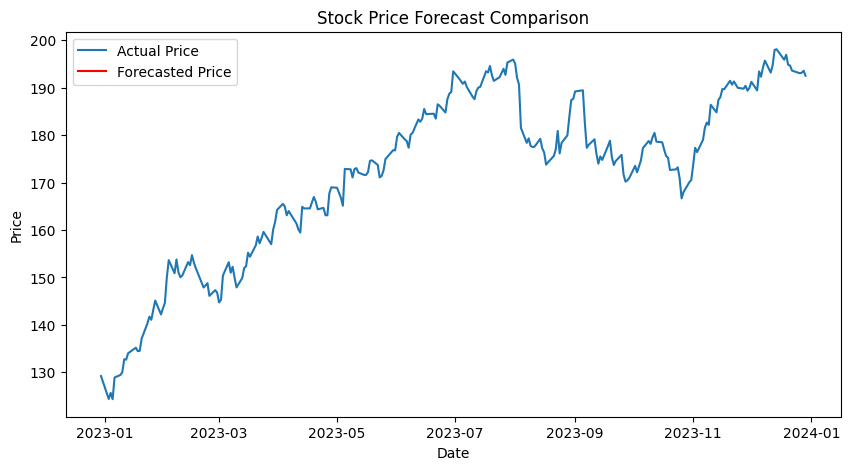

In [7]:
# Test for stationarity and apply differencing if necessary
# A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time.
# Most time series models, including ARIMA, are built on the assumption that the data is stationary. 
# These models might produce unreliable or invalid results if this assumption is violated.
# result = adfuller(df['Price'])
# if result[1] > 0.05:  # p-value is greater than 0.05, data is non-stationary
#     df['Price'] = df['Price'].diff().dropna()  # Applying differencing

# Prepare the training data (excluding the most recent 30 days)
train_data = df['Price'][:-30]

# Fit the ARIMA model
model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model.fit(train_data)

# Forecast the next 30 days (which are the last 30 days in the actual dataset)
forecast = model.predict(n_periods=30)

# Check if forecast contains NaN
if pd.isna(forecast).any():
    raise ValueError("Forecast contains NaN values. Model fitting might have failed.")

# Create a DataFrame for the forecasted values
forecast_index = df.index[-30:]  # Use the last 30 days from the actual dataset
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Price'], label='Actual Price')
plt.plot(forecast_df['Forecast'], label='Forecasted Price', color='red')
plt.title('Stock Price Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
forecast_index

DatetimeIndex(['2023-11-16 00:00:00-05:00', '2023-11-17 00:00:00-05:00',
               '2023-11-20 00:00:00-05:00', '2023-11-21 00:00:00-05:00',
               '2023-11-22 00:00:00-05:00', '2023-11-24 00:00:00-05:00',
               '2023-11-27 00:00:00-05:00', '2023-11-28 00:00:00-05:00',
               '2023-11-29 00:00:00-05:00', '2023-11-30 00:00:00-05:00',
               '2023-12-01 00:00:00-05:00', '2023-12-04 00:00:00-05:00',
               '2023-12-05 00:00:00-05:00', '2023-12-06 00:00:00-05:00',
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00',
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-1

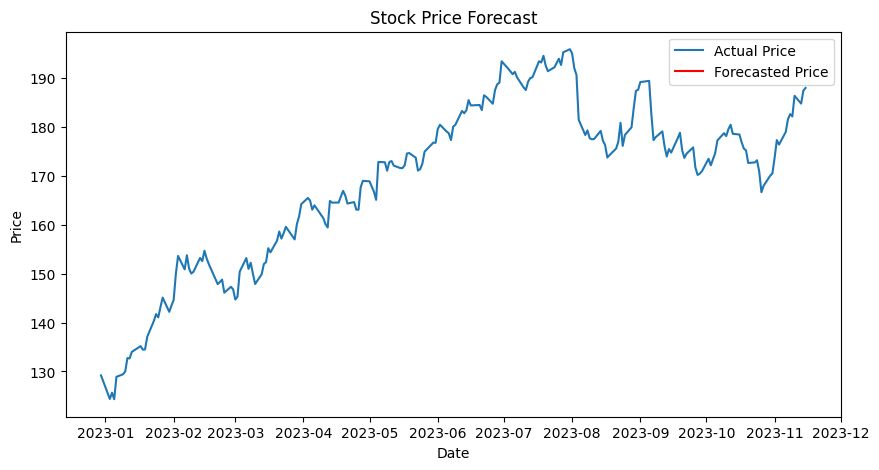

In [9]:
# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=31)[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Actual Price')
plt.plot(forecast_df['Forecast'], label='Forecasted Price', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()